<a href="https://colab.research.google.com/github/GeisilaCosta/AluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados e bibliotecas



In [32]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importações necessárias

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais dos gráficos
plt.style.use('seaborn-v0_8-muted')
sns.set_palette("Set2")
%matplotlib inline


In [18]:
# Adiciona a coluna 'Loja' em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Une os DataFrames em um só
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
df.head()



,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


 Visualização Inicial dos Dados

In [37]:
print(loja.columns)  # Lista as colunas do DataFrame da Loja 1

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [20]:
# Visualizando as primeiras linhas de cada loja
print("=== Loja 1 ===")
display(loja.head(2))
print("\n=== Loja 2 ===")
display(loja2.head(2))
print("\n=== Loja 3 ===")
display(loja3.head(2))
print("\n=== Loja 4 ===")
display(loja4.head(2))

# Verificando a estrutura do DataFrame consolidado
print("\n=== Estrutura do DataFrame Consolidado ===")
display(df.head(3))


=== Loja 1 ===


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1



=== Loja 2 ===


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38,Loja 2
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66,Loja 2



=== Loja 3 ===


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53,Loja 3
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50,Loja 3



=== Loja 4 ===


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79,Loja 4
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86,Loja 4



=== Estrutura do DataFrame Consolidado ===


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1


In [40]:
import pandas as pd

# 1. Somar a coluna 'Preço' de cada loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# 2. Criar um DataFrame resumido
df_faturamento = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

# 3. Adicionar média por venda (opcional)
df_faturamento['Média por Venda'] = [
    loja['Preço'].mean(), loja2['Preço'].mean(), loja3['Preço'].mean(), loja4['Preço'].mean()
]

# Mostrar resultado
print(df_faturamento)

     Loja  Faturamento Total  Média por Venda
0  Loja 1         1534509.12       650.491361
1  Loja 2         1488459.06       630.970352
2  Loja 3         1464025.03       620.612560
3  Loja 4         1384497.58       587.149101


Análise da Estrutura dos Dados

In [23]:
print(df.head())



                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    Loja  
0    cartao_credito                       8 -22.19 -48.79  Loja 1  
1    carta

Analise de faturamento por loja

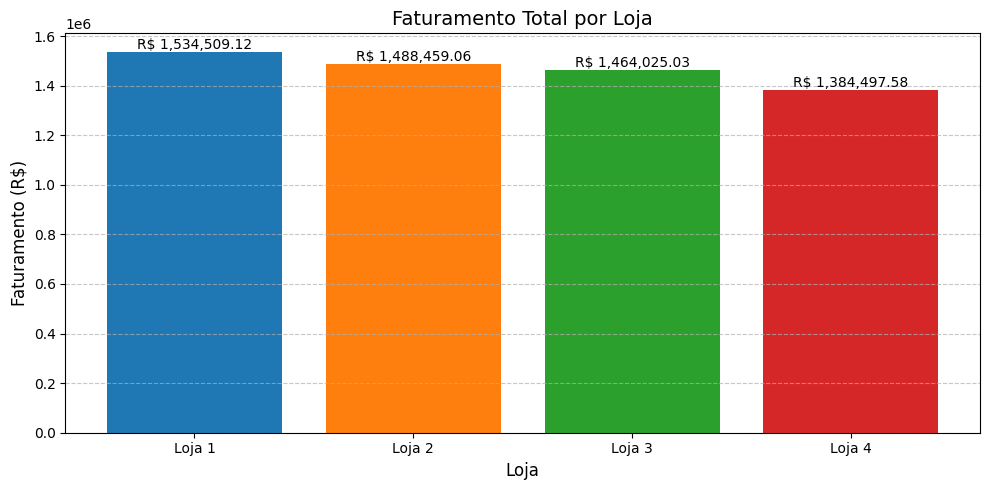

In [41]:
# visualizacao com grafico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento Total'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Adicionar rótulos de valor nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'R$ {height:,.2f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Faturamento Total por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [48]:
for df, nome in zip([loja, loja2, loja3, loja4], ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']):
    print(f"\n{nome}:")
    print(df.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False))


Loja 1:
Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Preço, dtype: float64

Loja 2:
Categoria do Produto
eletronicos              547773.71
eletrodomesticos         464758.13
moveis                   235234.68
instrumentos musicais    139987.03
esporte e lazer           46326.09
brinquedos                21262.21
utilidades domesticas     19662.86
livros                    13454.35
Name: Preço, dtype: float64

Loja 3:
Categoria do Produto
eletronicos              547699.92
eletrodomesticos         438984.89
moveis                   268095.56
instrumentos musicais    103174.45
esporte e lazer           47456.10
brinquedos                25869.20
utilidades domesticas     20080.21
livros                    12664.70
Name: Preço, d

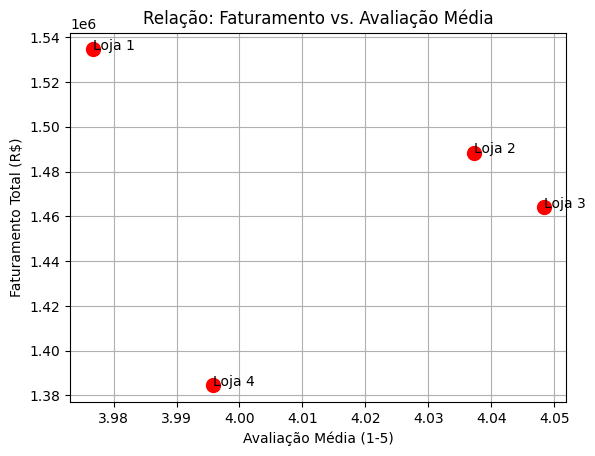

In [52]:
# Calcular avaliação média por loja
df_faturamento['Avaliação Média'] = [df['Avaliação da compra'].mean() for df in [loja, loja2, loja3, loja4]]

# Gráfico de dispersão
plt.scatter(df_faturamento['Avaliação Média'], df_faturamento['Faturamento Total'], c='red', s=100)
plt.title('Relação: Faturamento vs. Avaliação Média')
plt.xlabel('Avaliação Média (1-5)')
plt.ylabel('Faturamento Total (R$)')
for i, txt in enumerate(df_faturamento['Loja']):
    plt.annotate(txt, (df_faturamento['Avaliação Média'][i], df_faturamento['Faturamento Total'][i]))
plt.grid()
plt.show()

In [53]:
# Contar vendas online/offline por loja
for df, nome in zip([loja, loja2, loja3, loja4], ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']):
    local_vendas = df['Local da compra'].value_counts(normalize=True) * 100
    print(f"\n{nome} - % Vendas por Local:")
    print(local_vendas)


Loja 1 - % Vendas por Local:
Local da compra
SP    41.712590
RJ    12.632471
MG    11.233574
RS     6.570581
PR     5.426028
SC     4.027130
BA     3.179313
DF     2.246715
GO     2.161933
ES     1.610852
CE     1.356507
PE     1.314116
MT     0.932599
PA     0.932599
MS     0.763035
AL     0.635863
SE     0.593472
PB     0.593472
TO     0.466299
MA     0.423908
RN     0.381518
PI     0.254345
RO     0.211954
AP     0.169563
AM     0.127173
AC     0.042391
Name: proportion, dtype: float64

Loja 2 - % Vendas por Local:
Local da compra
SP    41.754981
RJ    13.183552
MG    11.996609
RS     5.256465
PR     4.154303
SC     3.984739
BA     3.306486
DF     2.967359
GO     2.501060
PE     2.119542
CE     1.695634
ES     1.441289
MT     0.847817
MS     0.805426
PA     0.678253
MA     0.593472
RN     0.551081
AL     0.551081
PB     0.508690
PI     0.254345
TO     0.254345
AM     0.169563
SE     0.169563
RO     0.169563
AC     0.042391
RR     0.042391
Name: proportion, dtype: float64

Loja 3 - 

In [54]:
#tcket medio por loja
df_faturamento['Ticket Médio'] = [df['Preço'].mean() for df in [loja, loja2, loja3, loja4]]
print(df_faturamento[['Loja', 'Ticket Médio']].sort_values('Ticket Médio', ascending=False))

     Loja  Ticket Médio
0  Loja 1    650.491361
1  Loja 2    630.970352
2  Loja 3    620.612560
3  Loja 4    587.149101


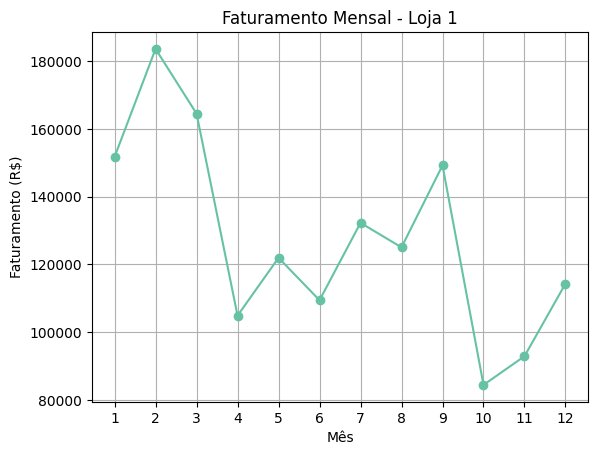

In [55]:
#sazonalidade(faturamento por mes)
# Converter data e extrair mês
loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], format='%d/%m/%Y')
faturamento_mensal = loja.groupby(loja['Data da Compra'].dt.month)['Preço'].sum()

plt.plot(faturamento_mensal.index, faturamento_mensal.values, marker='o')
plt.title('Faturamento Mensal - Loja 1')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.xticks(range(1, 13))
plt.grid()
plt.show()

In [76]:
from google.colab import files
df_faturamento.to_csv('faturamento_lojas.csv', index=False)
files.download('faturamento_lojas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Vendas por Categoria


In [56]:
# Dicionário para armazenar os resultados
produtos_por_categoria = {}

for df, nome in zip([loja, loja2, loja3, loja4], ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']):
    contagem = df['Categoria do Produto'].value_counts().reset_index()
    contagem.columns = ['Categoria', 'Quantidade Vendida']
    produtos_por_categoria[nome] = contagem

# Exemplo para Loja 1
print("Loja 1 - Produtos por Categoria:")
print(produtos_por_categoria['Loja 1'].head())




Loja 1 - Produtos por Categoria:
          Categoria  Quantidade Vendida
0            moveis                 465
1       eletronicos                 448
2        brinquedos                 324
3  eletrodomesticos                 312
4   esporte e lazer                 284


In [57]:
print(type(loja))


<class 'pandas.core.frame.DataFrame'>


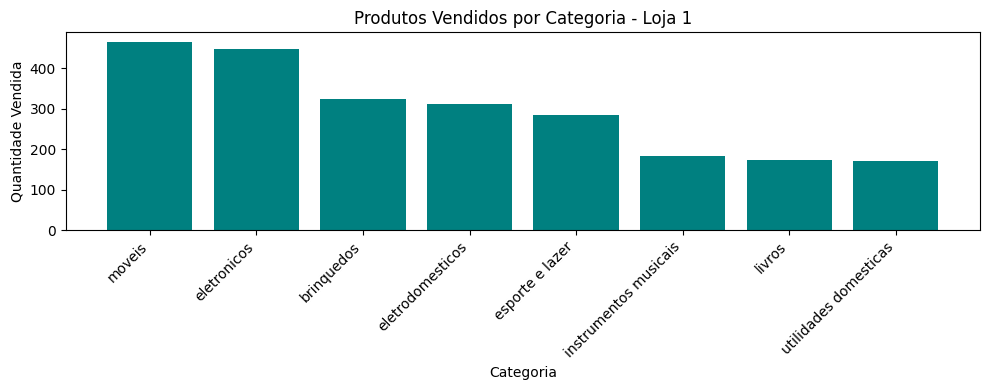

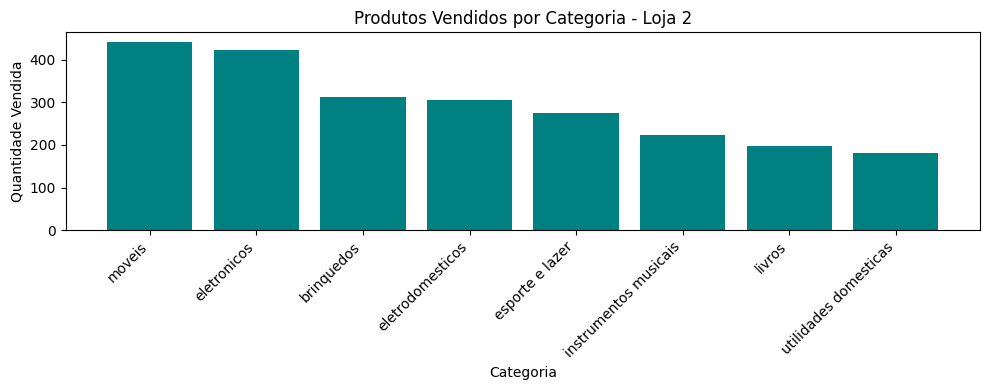

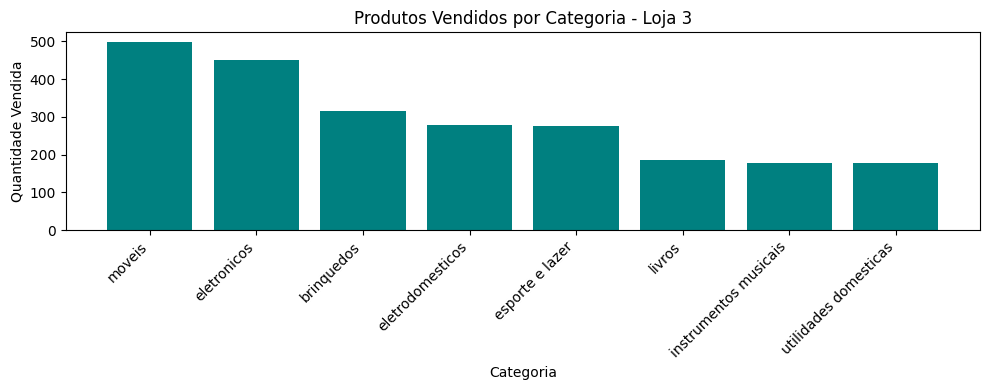

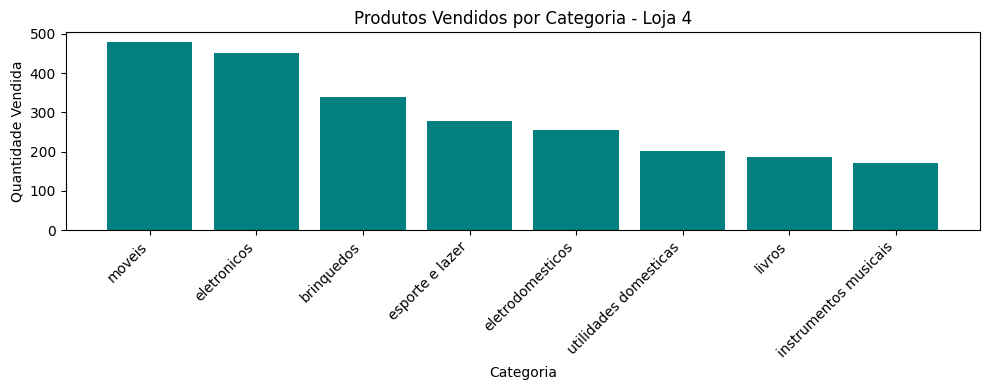

In [58]:
import matplotlib.pyplot as plt

for nome, dados in produtos_por_categoria.items():
    plt.figure(figsize=(10, 4))
    plt.bar(dados['Categoria'], dados['Quantidade Vendida'], color='teal')
    plt.title(f'Produtos Vendidos por Categoria - {nome}')
    plt.xlabel('Categoria')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [62]:
# Top 3 categorias por loja
for nome, dados in produtos_por_categoria.items():
    top3 = dados.nlargest(3, 'Quantidade Vendida')
    print(f"\n{nome} - Top 3 Categorias:")
    print(top3)



Loja 1 - Top 3 Categorias:
     Categoria  Quantidade Vendida
0       moveis                 465
1  eletronicos                 448
2   brinquedos                 324

Loja 2 - Top 3 Categorias:
     Categoria  Quantidade Vendida
0       moveis                 442
1  eletronicos                 422
2   brinquedos                 313

Loja 3 - Top 3 Categorias:
     Categoria  Quantidade Vendida
0       moveis                 499
1  eletronicos                 451
2   brinquedos                 315

Loja 4 - Top 3 Categorias:
     Categoria  Quantidade Vendida
0       moveis                 480
1  eletronicos                 451
2   brinquedos                 338


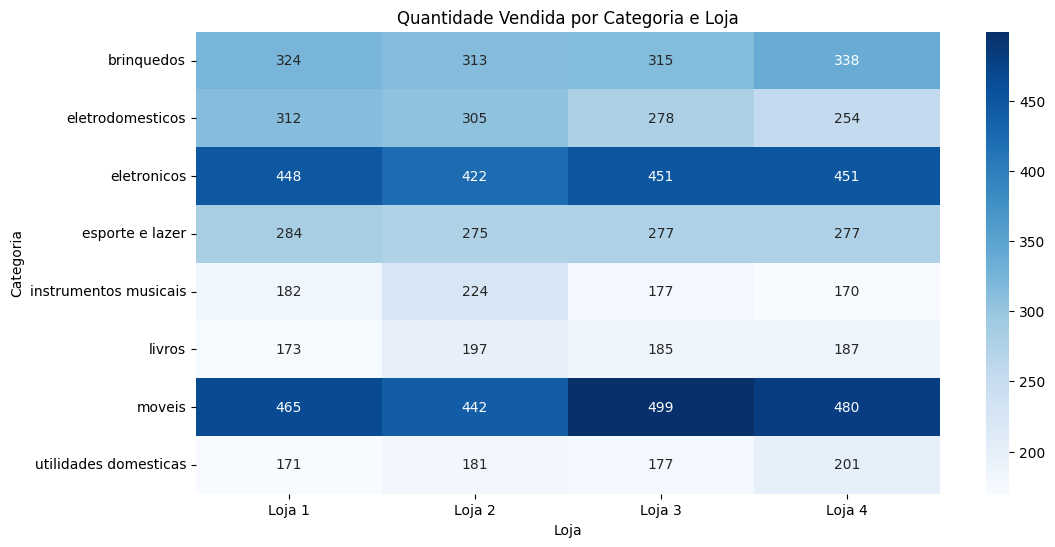

In [63]:
# Juntar todos os dados em um único DataFrame
df_comparativo = pd.concat([
    produtos_por_categoria['Loja 1'].assign(Loja='Loja 1'),
    produtos_por_categoria['Loja 2'].assign(Loja='Loja 2'),
    produtos_por_categoria['Loja 3'].assign(Loja='Loja 3'),
    produtos_por_categoria['Loja 4'].assign(Loja='Loja 4')
])

# Gráfico de heatmap (opcional)
import seaborn as sns
pivot_df = df_comparativo.pivot(index='Categoria', columns='Loja', values='Quantidade Vendida').fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='Blues')
plt.title('Quantidade Vendida por Categoria e Loja')
plt.show()

In [64]:
faturamento_categoria = loja.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(faturamento_categoria)

Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Preço, dtype: float64


In [87]:
# prompt: criar e salvar um csv para os dados de vendas por categoria

# Convertendo a série para DataFrame
faturamento_categoria = faturamento_categoria.reset_index()

# Salvando o DataFrame como um arquivo CSV
faturamento_categoria.to_csv('faturamento_por_categoria.csv', index=False)

# Baixando o arquivo para o seu computador (opcional)
files.download('faturamento_por_categoria.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Média de Avaliação das Lojas

In [66]:
# Calcular a média da coluna 'Avaliação da compra' para cada loja
media_avaliacoes = {
    'Loja 1': loja['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean()
}

# Criar um DataFrame para visualização
df_avaliacoes = pd.DataFrame(list(media_avaliacoes.items()), columns=['Loja', 'Avaliação Média'])
df_avaliacoes['Avaliação Média'] = df_avaliacoes['Avaliação Média'].round(2)  # Arredondar para 2 decimais

print(df_avaliacoes)

     Loja  Avaliação Média
0  Loja 1             3.98
1  Loja 2             4.04
2  Loja 3             4.05
3  Loja 4             4.00


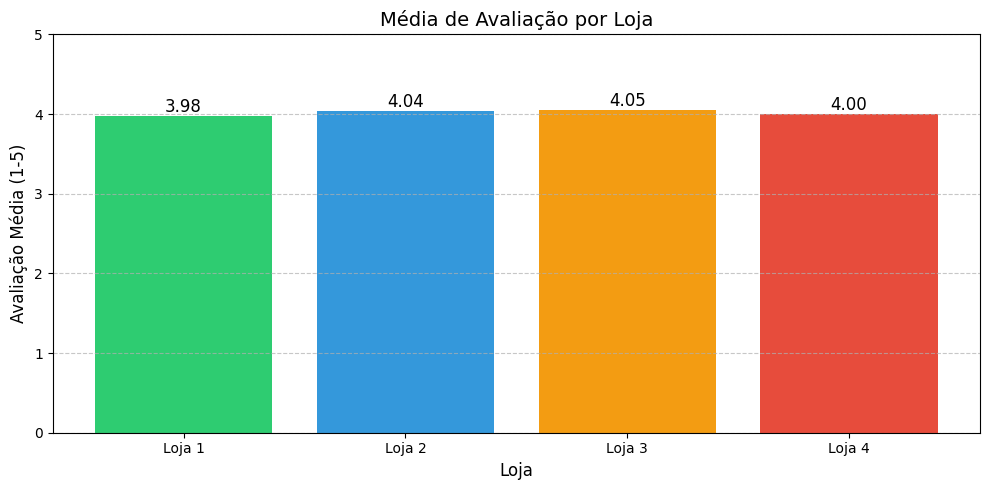

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(df_avaliacoes['Loja'], df_avaliacoes['Avaliação Média'], color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'])

# Adicionar os valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12)

plt.title('Média de Avaliação por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Avaliação Média (1-5)', fontsize=12)
plt.ylim(0, 5)  # Limitar o eixo Y para escala de 1 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [68]:
# Exemplo para Loja 1
avaliacao_por_categoria = loja.groupby('Categoria do Produto')['Avaliação da compra'].mean().sort_values()
print("\nLoja 1 - Avaliação Média por Categoria:")
print(avaliacao_por_categoria)


Loja 1 - Avaliação Média por Categoria:
Categoria do Produto
utilidades domesticas    3.748538
esporte e lazer          3.897887
moveis                   3.946237
livros                   3.976879
eletronicos              4.004464
eletrodomesticos         4.032051
instrumentos musicais    4.049451
brinquedos               4.077160
Name: Avaliação da compra, dtype: float64


In [80]:
# Lista de DataFrames e nomes das lojas
lojas = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Calcular avaliação média por categoria para cada loja
for nome_loja, df_loja in lojas.items():
    avaliacao_por_categoria = df_loja.groupby('Categoria do Produto')['Avaliação da compra'].mean().sort_values(ascending=False)

    print(f"\n{nome_loja} - Avaliação Média por Categoria:")
    print(avaliacao_por_categoria.round(2))  # Arredonda para 2 casas decimais


Loja 1 - Avaliação Média por Categoria:
Categoria do Produto
brinquedos               4.08
instrumentos musicais    4.05
eletrodomesticos         4.03
eletronicos              4.00
livros                   3.98
moveis                   3.95
esporte e lazer          3.90
utilidades domesticas    3.75
Name: Avaliação da compra, dtype: float64

Loja 2 - Avaliação Média por Categoria:
Categoria do Produto
moveis                   4.09
eletrodomesticos         4.07
utilidades domesticas    4.07
esporte e lazer          4.07
instrumentos musicais    4.04
brinquedos               4.03
eletronicos              3.97
livros                   3.95
Name: Avaliação da compra, dtype: float64

Loja 3 - Avaliação Média por Categoria:
Categoria do Produto
brinquedos               4.20
moveis                   4.10
utilidades domesticas    4.07
livros                   4.05
eletrodomesticos         4.01
instrumentos musicais    4.01
eletronicos              3.99
esporte e lazer          3.94
Name: Aval

In [81]:
for nome_loja, df_loja in lojas.items():
    avaliacao_por_categoria = df_loja.groupby('Categoria do Produto')['Avaliação da compra'].mean()\
                                    .round(2)\
                                    .sort_values(ascending=False)\
                                    .reset_index()

    print(f"\n{nome_loja} - Avaliação Média por Categoria:")
    display(avaliacao_por_categoria)  # Usa display() para tabelas formatadas no Colab/Jupyter


Loja 1 - Avaliação Média por Categoria:


,Categoria do Produto,Avaliação da compra
0,brinquedos,4.08
1,instrumentos musicais,4.05
2,eletrodomesticos,4.03
3,eletronicos,4.00
4,livros,3.98
5,moveis,3.95
6,esporte e lazer,3.90
7,utilidades domesticas,3.75



Loja 2 - Avaliação Média por Categoria:


,Categoria do Produto,Avaliação da compra
0,moveis,4.09
1,eletrodomesticos,4.07
2,utilidades domesticas,4.07
3,esporte e lazer,4.07
4,instrumentos musicais,4.04
5,brinquedos,4.03
6,eletronicos,3.97
7,livros,3.95



Loja 3 - Avaliação Média por Categoria:


,Categoria do Produto,Avaliação da compra
0,brinquedos,4.20
1,moveis,4.10
2,utilidades domesticas,4.07
3,livros,4.05
4,eletrodomesticos,4.01
5,instrumentos musicais,4.01
6,eletronicos,3.99
7,esporte e lazer,3.94



Loja 4 - Avaliação Média por Categoria:


,Categoria do Produto,Avaliação da compra
0,esporte e lazer,4.05
1,livros,4.04
2,utilidades domesticas,4.01
3,eletronicos,4.01
4,moveis,4.00
5,brinquedos,3.99
6,eletrodomesticos,3.93
7,instrumentos musicais,3.91


In [82]:
# Juntar avaliação e faturamento por categoria (para uma loja específica)
analise_loja1 = loja.groupby('Categoria do Produto').agg({
    'Avaliação da compra': 'mean',
    'Preço': 'sum'
}).round(2).sort_values('Avaliação da compra', ascending=False)

print("\nLoja 1 - Avaliação vs Faturamento por Categoria:")
display(analise_loja1)


Loja 1 - Avaliação vs Faturamento por Categoria:


,Avaliação da compra,Preço
Categoria do Produto,,
brinquedos,4.08,23993.78
instrumentos musicais,4.05,121731.69
eletrodomesticos,4.03,484913.36
eletronicos,4.00,572659.23
livros,3.98,11713.92
moveis,3.95,250178.11
esporte e lazer,3.90,52387.55
utilidades domesticas,3.75,16931.48


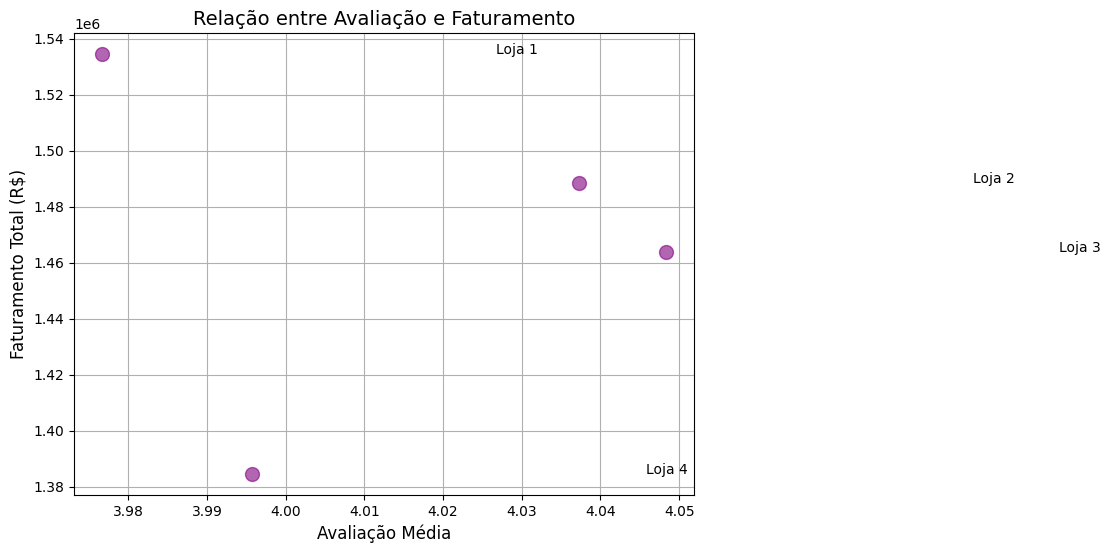

In [79]:
# Juntar dados de faturamento e avaliação
# Use 'Avaliação da compra' if that's the column name in df_avaliacoes
df_analise = pd.merge(df_faturamento, df_avaliacoes, on='Loja', suffixes=('', '_y'))
# Renomear a coluna se necessário
df_analise = df_analise.rename(columns={'Avaliação da compra': 'Avaliação Média'})

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df_analise['Avaliação Média'], df_analise['Faturamento Total'], s=100, c='purple', alpha=0.6)
plt.title('Relação entre Avaliação e Faturamento', fontsize=14)
plt.xlabel('Avaliação Média', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)

# Adicionar rótulos das lojas
for i, row in df_analise.iterrows():
    plt.text(row['Avaliação Média'] + 0.05, row['Faturamento Total'], row['Loja'], fontsize=10)

plt.grid()
plt.show()

In [83]:
# Ordenar lojas pela pior avaliação
lojas_para_analisar = df_avaliacoes.sort_values('Avaliação Média').head(1)

print("\nRecomendação para venda:")
print(f"Loja: {lojas_para_analisar['Loja'].values[0]} | Avaliação Média: {lojas_para_analisar['Avaliação Média'].values[0]}")
print("Motivo: Esta loja tem a menor satisfação dos clientes, o que pode impactar negativamente a reputação da rede.")


Recomendação para venda:
Loja: Loja 1 | Avaliação Média: 3.98
Motivo: Esta loja tem a menor satisfação dos clientes, o que pode impactar negativamente a reputação da rede.


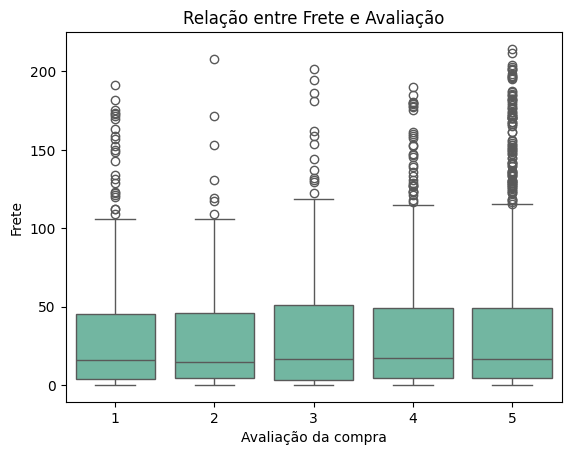

In [74]:
sns.boxplot(data=loja, x='Avaliação da compra', y='Frete')
plt.title('Relação entre Frete e Avaliação')
plt.show()

In [86]:
avaliacao_por_categoria.to_csv('avaliacao_categorias_loja1.csv')

# 4. Produtos Mais e Menos Vendidos

In [88]:
import pandas as pd

# Dicionário para armazenar os resultados
produtos_mais_vendidos = {}
produtos_menos_vendidos = {}

# Lista de DataFrames e nomes das lojas
lojas = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

for nome, df in lojas.items():
    # Contar vendas por produto
    vendas_por_produto = df['Produto'].value_counts().reset_index()
    vendas_por_produto.columns = ['Produto', 'Quantidade Vendida']

    # Ordenar do mais vendido para o menos vendido
    vendas_por_produto = vendas_por_produto.sort_values('Quantidade Vendida', ascending=False)

    # Armazenar top 5 e piores 5
    produtos_mais_vendidos[nome] = vendas_por_produto.head(5)
    produtos_menos_vendidos[nome] = vendas_por_produto.tail(5)

# Exemplo para Loja 1
print("\nLoja 1 - Top 5 Produtos Mais Vendidos:")
print(produtos_mais_vendidos['Loja 1'])


Loja 1 - Top 5 Produtos Mais Vendidos:
              Produto  Quantidade Vendida
0         Micro-ondas                  60
1       TV Led UHD 4K                  60
2       Guarda roupas                  60
3  Secadora de roupas                  58
4              Cômoda                  56


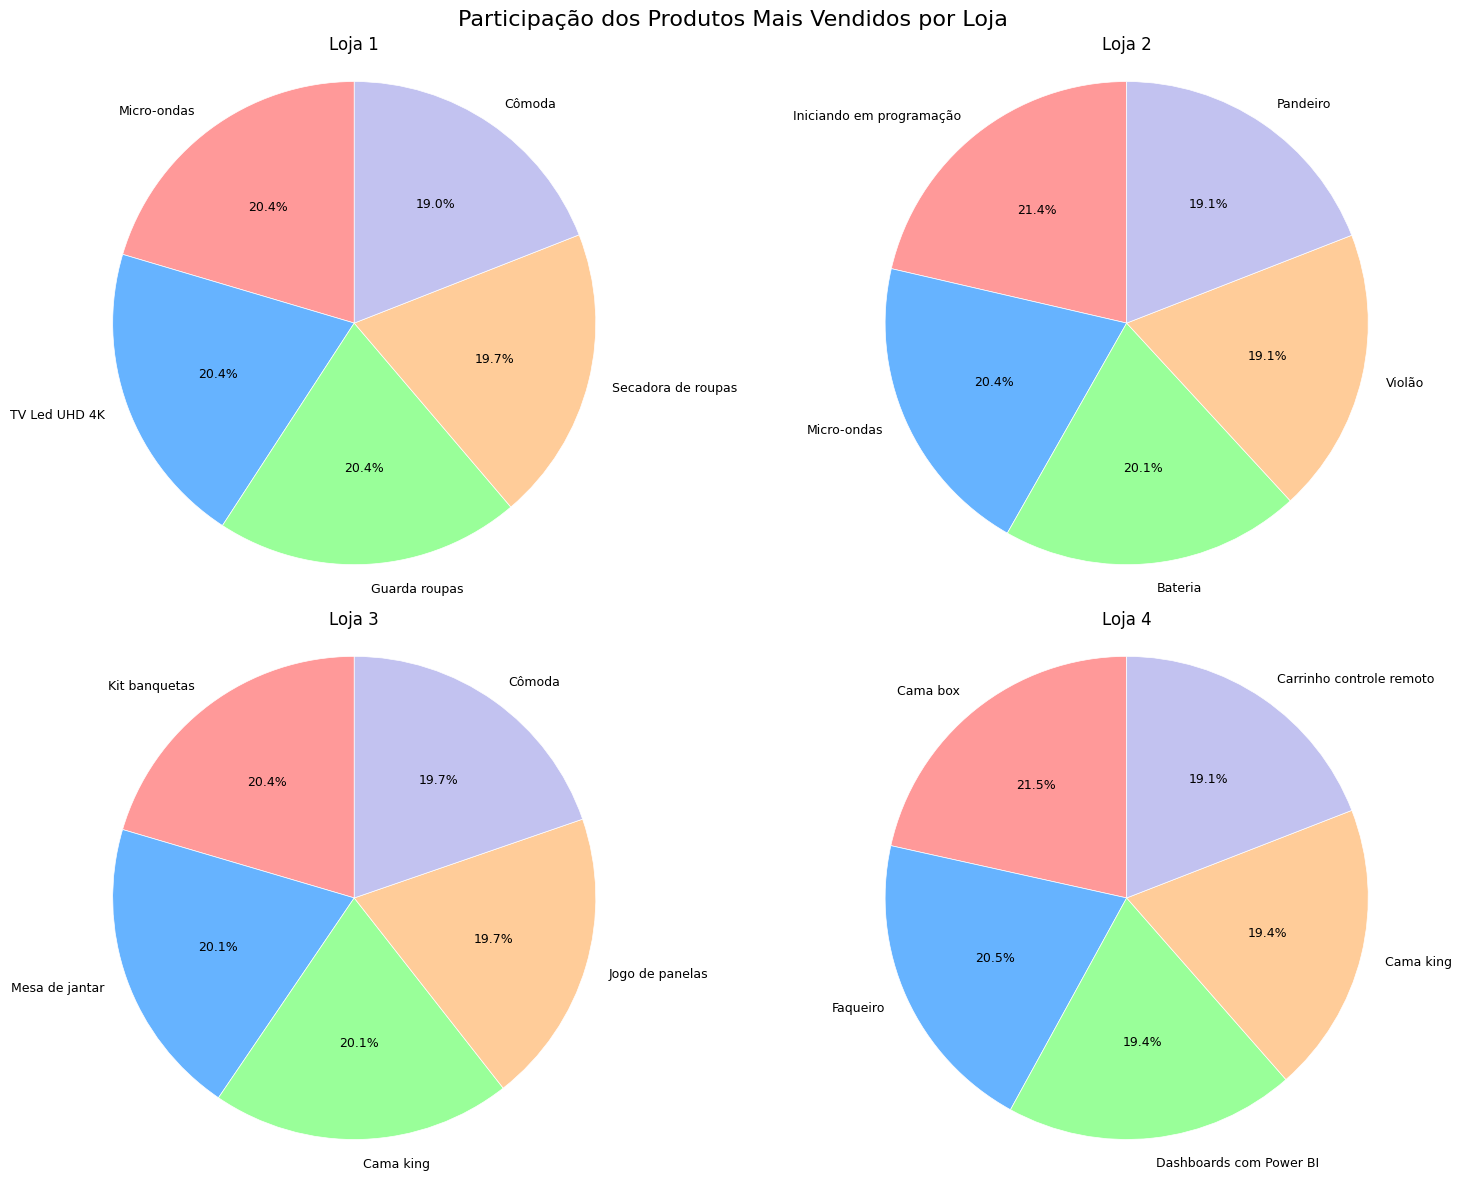

In [97]:
import matplotlib.pyplot as plt

# Configuração dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Participação dos Produtos Mais Vendidos por Loja', fontsize=16)

# Plotar pizza para cada loja
for i, (nome, df) in enumerate(produtos_mais_vendidos.items()):
    ax = axes[i//2, i%2]

    # Gráfico de pizza (top 5 produtos)
    ax.pie(
        df['Quantidade Vendida'],
        labels=df['Produto'],
        autopct='%1.1f%%',  # Mostra porcentagens
        startangle=90,
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],
        wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
        textprops={'fontsize': 9}

    )
    ax.set_title(nome, fontsize=12)
    ax.axis('equal')  # Assegura que o gráfico fique redondo

plt.tight_layout()
plt.show()

In [91]:
print("\nProdutos Menos Vendidos por Loja:")
for nome, df in produtos_menos_vendidos.items():
    print(f"\n{nome}:")
    print(df)


Produtos Menos Vendidos por Loja:

Loja 1:
                        Produto  Quantidade Vendida
46  Ciência de dados com python                  39
47                     Pandeiro                  36
48            Panela de pressão                  35
49                      Headset                  33
50                 Celular ABXY                  33

Loja 2:
              Produto  Quantidade Vendida
46     Fone de ouvido                  37
47           Poltrona                  35
48     Mesa de jantar                  34
49         Impressora                  34
50  Jogo de tabuleiro                  32

Loja 3:
             Produto  Quantidade Vendida
46          Guitarra                  38
47     Jogo de copos                  36
48           Mochila                  36
49       Micro-ondas                  36
50  Blocos de montar                  35

Loja 4:
                        Produto  Quantidade Vendida
46                    Geladeira                  38
47  Ciência de 

In [92]:
for nome, df in lojas.items():
    produtos_fracos = produtos_menos_vendidos[nome]['Produto'].tolist()
    print(f"\n{nome} - Categorias dos Produtos Menos Vendidos:")
    print(df[df['Produto'].isin(produtos_fracos)][['Produto', 'Categoria do Produto']].drop_duplicates())


Loja 1 - Categorias dos Produtos Menos Vendidos:
                         Produto   Categoria do Produto
13             Panela de pressão  utilidades domesticas
15   Ciência de dados com python                 livros
75                       Headset            eletronicos
104                 Celular ABXY            eletronicos
209                     Pandeiro  instrumentos musicais

Loja 2 - Categorias dos Produtos Menos Vendidos:
               Produto Categoria do Produto
12   Jogo de tabuleiro           brinquedos
32            Poltrona               moveis
76      Mesa de jantar               moveis
106     Fone de ouvido          eletronicos
156         Impressora          eletronicos

Loja 3 - Categorias dos Produtos Menos Vendidos:
              Produto   Categoria do Produto
14      Jogo de copos  utilidades domesticas
44            Mochila        esporte e lazer
93           Guitarra  instrumentos musicais
150       Micro-ondas       eletrodomesticos
220  Blocos de montar    

In [93]:
df.groupby('Produto')['Preço'].sum().sort_values(ascending=False)

,Preço
Produto,
Celular Plus X42,128930.07
TV Led UHD 4K,120393.25
Smart TV,110387.57
Geladeira,100362.59
Tablet ABXY,75630.75
Lava louças,73798.99
Lavadora de roupas,69951.68
Secadora de roupas,56349.30
Celular ABXY,53561.83


In [98]:
# Para cada loja:
for nome, df in lojas.items():
    faturamento_por_produto = df.groupby('Produto')['Preço'].sum().sort_values(ascending=False)
    print(f"\n{nome} - Top 5 Produtos em Faturamento:")
    print(faturamento_por_produto.head(5))


Loja 1 - Top 5 Produtos em Faturamento:
Produto
TV Led UHD 4K         189534.28
Geladeira             149524.28
Celular Plus X42      130536.40
Smart TV               89936.15
Lavadora de roupas     87711.30
Name: Preço, dtype: float64

Loja 2 - Top 5 Produtos em Faturamento:
Produto
Celular Plus X42      150967.83
TV Led UHD 4K         137833.06
Geladeira             130176.48
Lavadora de roupas     89016.81
Smart TV               81522.94
Name: Preço, dtype: float64

Loja 3 - Top 5 Produtos em Faturamento:
Produto
Geladeira           133185.99
TV Led UHD 4K       128892.11
Celular Plus X42    124300.84
Smart TV            105116.46
Lava louças          85819.73
Name: Preço, dtype: float64

Loja 4 - Top 5 Produtos em Faturamento:
Produto
Celular Plus X42    128930.07
TV Led UHD 4K       120393.25
Smart TV            110387.57
Geladeira           100362.59
Tablet ABXY          75630.75
Name: Preço, dtype: float64


In [101]:
for nome, df in lojas.items():
    avaliacao_produtos = df.groupby('Produto')['Avaliação da compra'].mean().round(2)
    print(f"\n{nome} - Avaliação dos Produtos Mais Vendidos:")
    print(avaliacao_produtos.loc[produtos_mais_vendidos[nome]['Produto']])


Loja 1 - Avaliação dos Produtos Mais Vendidos:
Produto
Micro-ondas           3.98
TV Led UHD 4K         4.05
Guarda roupas         3.95
Secadora de roupas    3.95
Cômoda                3.80
Name: Avaliação da compra, dtype: float64

Loja 2 - Avaliação dos Produtos Mais Vendidos:
Produto
Iniciando em programação    4.00
Micro-ondas                 4.08
Bateria                     4.03
Violão                      4.00
Pandeiro                    4.19
Name: Avaliação da compra, dtype: float64

Loja 3 - Avaliação dos Produtos Mais Vendidos:
Produto
Kit banquetas      4.21
Mesa de jantar     4.18
Cama king          4.04
Jogo de panelas    4.11
Cômoda             4.25
Name: Avaliação da compra, dtype: float64

Loja 4 - Avaliação dos Produtos Mais Vendidos:
Produto
Cama box                    3.98
Faqueiro                    3.98
Dashboards com Power BI     4.02
Cama king                   3.86
Carrinho controle remoto    3.95
Name: Avaliação da compra, dtype: float64


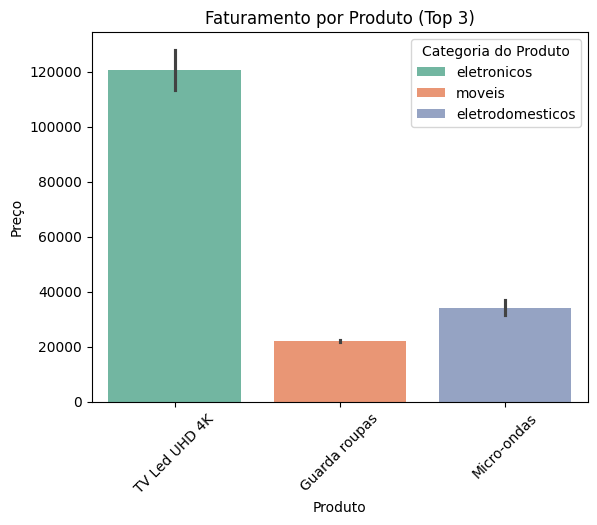

In [103]:
import seaborn as sns

# Exemplo para uma loja:
top_produtos = produtos_mais_vendidos['Loja 1'].head(3)
df_top = df[df['Produto'].isin(top_produtos['Produto'])]

sns.barplot(data=df_top, x='Produto', y='Preço', hue='Categoria do Produto', estimator=sum)
plt.title('Faturamento por Produto (Top 3)')
plt.xticks(rotation=45)
plt.show()

# 5. Frete Médio por Loja
